<a href="https://colab.research.google.com/github/ameyvadnere/CS418-Statistical-Pattern-Recognition-Lab/blob/master/Assn1_Q1b.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries

from keras.datasets import mnist  # MNIST Dataset
import numpy as np                # For numerical computations
from tqdm.notebook import tqdm    # For progress bar
import seaborn as sns             # Plotting
from scipy.stats import multivariate_normal     # Multivariate Gaussian function
import matplotlib.pyplot as plt     # Plotting

In [2]:
m_train, m_test = 60000, 10000  # Training and testing size
n = 784     # Dimensionality

(train_X, train_y), (test_X, test_y) = mnist.load_data()        # Loading the dataset into numpy array

train_X = train_X.reshape(-1, n)/255.
test_X = test_X.reshape(-1, n)/255.

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
# Estimate Rate Parameter (Lambda) for each class
def compute_ratepars(train_X, train_y, classes=list(range(10))):
    ratepars = []
    k = train_X.shape[1]

    for i in tqdm(range(len(classes))):
        filter = np.where(train_y == classes[i])
        X = train_X[filter]

        ratepar = 1/(np.mean(X, axis=0) + 1e-16)
        count = X.shape[0]

        ratepars.append(ratepar)

    return ratepars

# Compute prior probabilities
def compute_priors(train_X, train_y, classes=list(range(10))):
    priors = {}     # Prior probabilities
    for i in classes:
        filter = np.where(train_y == i)
        X = train_X[filter]
        count = X.shape[0]
        priors[i] = count/train_X.shape[0]

    return priors

In [4]:
ratepars = compute_ratepars(train_X, train_y, classes=list(range(10)))
priors = compute_priors(train_X, train_y)

In [5]:
# Visualize how the mean images look like.
def show_means(ratepars):
    fig = plt.figure(figsize=(12,12))
    fig.subplots_adjust(hspace=0.1, wspace=0.1)
    for i in range(len(ratepars)):
        
        ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        ax.imshow((1/ratepars[i]).reshape(28,28))
    
    plt.show()

# Plot rate parameters for each class

def show_ratepars(ratepars):
    fig = plt.figure(figsize=(10,10))
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(len(ratepars)):
        
        ax = fig.add_subplot(4, 3, i+1, xticks=[], yticks=[])
        ax.imshow(ratepars[i].reshape(28,28))
        plt.title('Class ' + str(i))
    
    plt.show()


def plot_distributions(train_X, train_y):
    fig, axes = plt.subplots(10, 3, figsize=(9, 30))
    for i in range(10):
        x = train_X[train_y == i]
        feats = [42, 392, 489]
        for j in range(3):
            axes[i,j].hist(x[feats[j]], density=True)
            axes[9,j].set_xlabel('Feature ' + str(feats[j]))    
        axes[i,0].set_ylabel('Class ' + str(i))

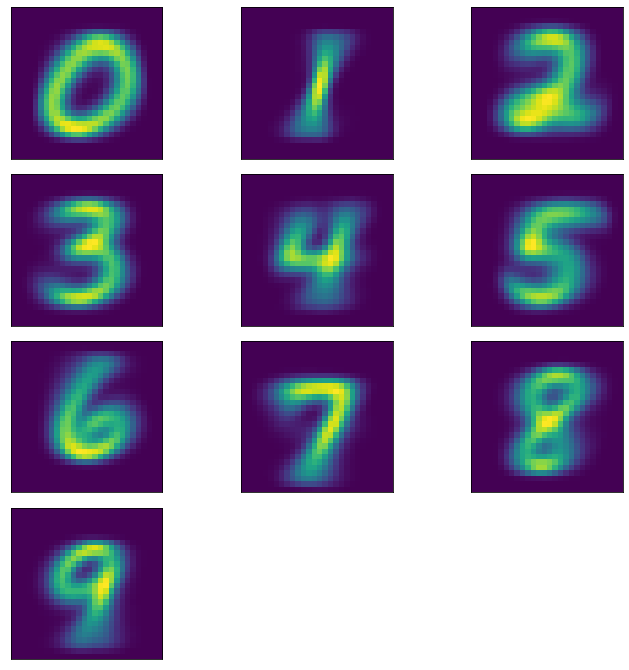

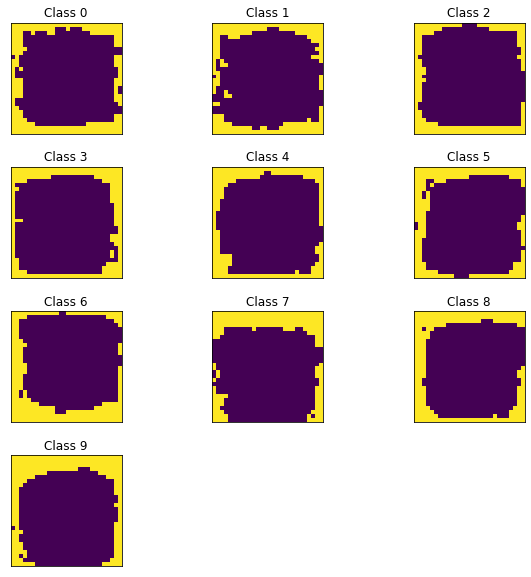

In [54]:
show_means(ratepars)
show_ratepars(ratepars)

In [6]:
# Return log of posterior probability

def posterior(X, i, priors):

    ratepar, prior = ratepars[i], priors[i]    
    return (np.log(np.sum(ratepar)) - np.matmul(X, ratepar)) * prior



In [7]:
# Predict a class for each sample in X matrix

def predict(X, classes=list(range(10))):
    posteriors = []
    priors = compute_priors(train_X, train_y, classes)
    for i in classes:
        probs = posterior(X, i, priors)
        posteriors.append(probs)
    
    return np.array([classes[x] for x in np.argmax(posteriors, axis=0)])


In [8]:
# Predictions for an image

preds_train = predict(train_X)
preds = predict(test_X)

In [9]:
# Train and Test Accuracy
print("Train Accuracy: ", np.mean(preds_train == train_y))
print("Test Accuracy: ", np.mean(preds == test_y))

Train Accuracy:  0.6943333333333334
Test Accuracy:  0.7029


Text(0.5, 1.0, 'Confusion Matrix (10 classes)')

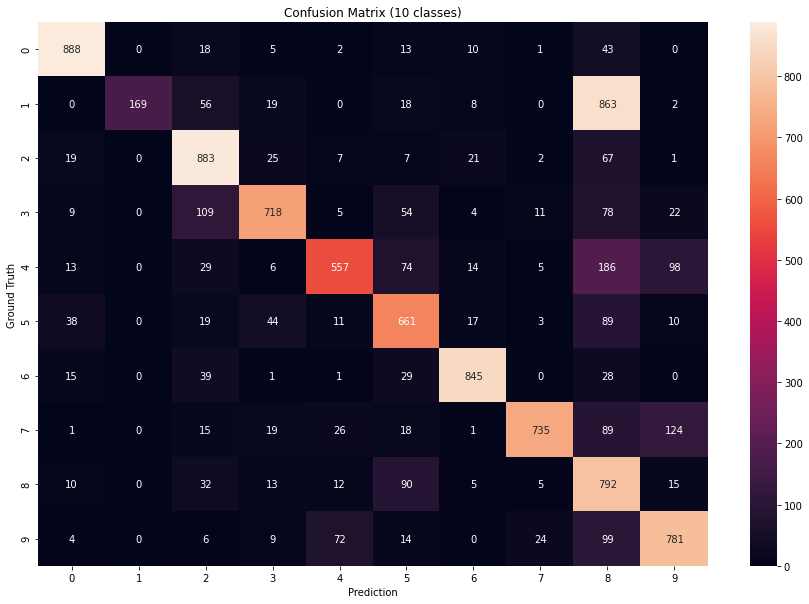

In [10]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, preds)
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True, fmt='.0f')
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')
plt.title('Confusion Matrix (10 classes)')

Train Accuracy:  0.7659710052572886
Test Accuracy:  0.7809254013220018


Text(69.0, 0.5, 'Ground Truth')

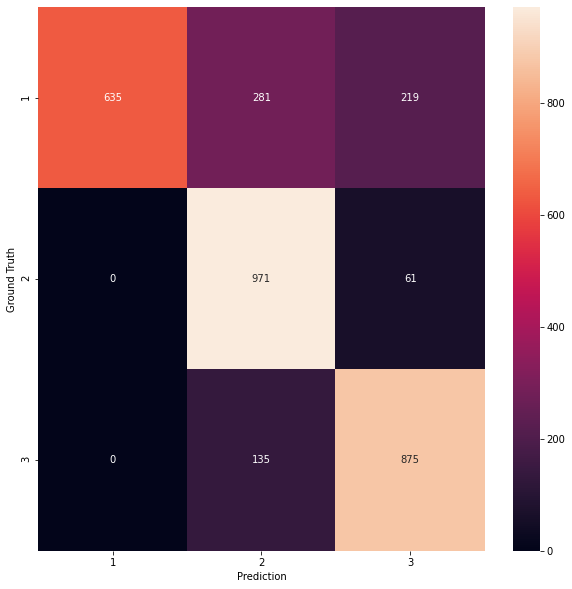

In [61]:
# Generating different subsets: Classes = [1,2,3]

subset1 = np.where((train_y == 1) | (train_y == 2) | (train_y == 3))
subset2 = np.where((test_y == 1) | (test_y == 2) | (test_y == 3))
preds_train = predict(train_X[subset1], [1, 2, 3])
preds = predict(test_X[subset2], [1, 2, 3])

# Train Accuracy:
print("Train Accuracy: ", np.mean(preds_train == train_y[subset1]))
# Test Accuracy
print("Test Accuracy: ", np.mean(preds == test_y[subset2]))

# Confusion matrix

cm = confusion_matrix(test_y[subset2], preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=[1,2,3], yticklabels=[1,2,3])
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')

Train Accuracy:  0.8908525005275375
Test Accuracy:  0.9019546027742749


Text(69.0, 0.5, 'Ground Truth')

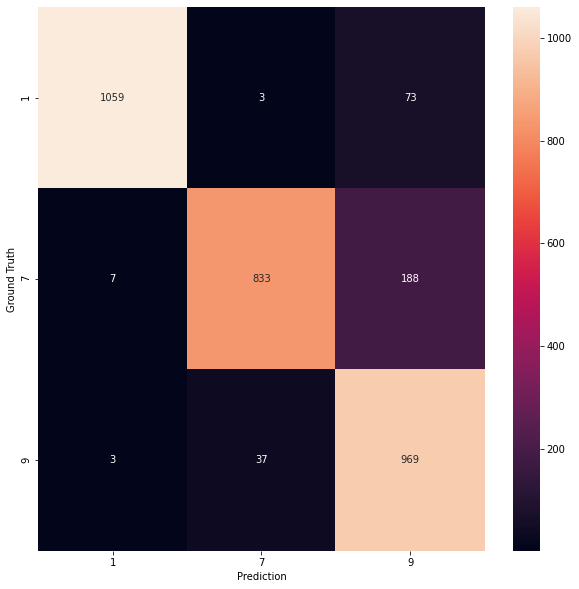

In [62]:
# Generating different subsets: Classes = [1,7,9]

subset1 = np.where((train_y == 1) | (train_y == 7) | (train_y == 9))
subset2 = np.where((test_y == 1) | (test_y == 7) | (test_y == 9))
preds_train = predict(train_X[subset1], [1, 7, 9])
preds = predict(test_X[subset2], [1, 7, 9])


# Train Accuracy
print("Train Accuracy: ", np.mean(preds_train == train_y[subset1]))
# Test Accuracy
print("Test Accuracy: ", np.mean(preds == test_y[subset2]))

# Confusion matrix

cm = confusion_matrix(test_y[subset2], preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=[1,7,9], yticklabels=[1,7,9])
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')

Train Accuracy:  0.8924881318067579
Test Accuracy:  0.902834008097166


Text(69.0, 0.5, 'Ground Truth')

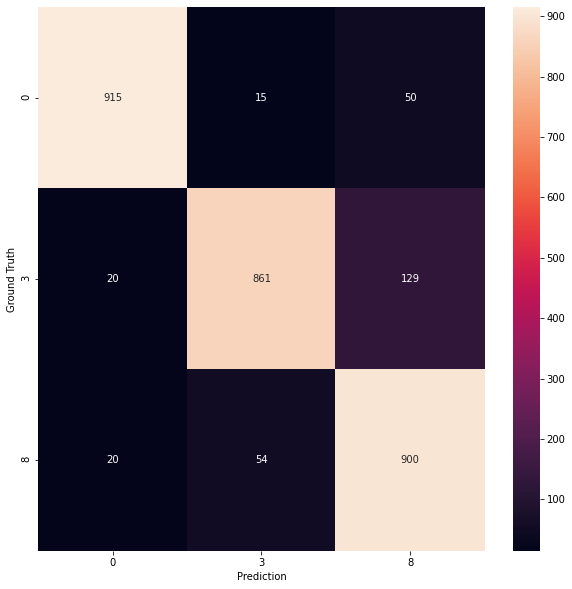

In [63]:
# Generating different subsets: Classes = [0, 3, 8]

subset1 = np.where((train_y == 0) | (train_y == 3) | (train_y == 8))
subset2 = np.where((test_y == 0) | (test_y == 3) | (test_y == 8))
preds_train = predict(train_X[subset1], [0,3,8])
preds = predict(test_X[subset2], [0, 3, 8])

# Train Accuracy
print("Train Accuracy: ", np.mean(preds_train == train_y[subset1]))
# Test Accuracy
print("Test Accuracy: ", np.mean(preds == test_y[subset2]))

# Confusion matrix

cm = confusion_matrix(test_y[subset2], preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=[0,3,8], yticklabels=[0,3,8])
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')

Train Accuracy:  0.8784175873228435
Test Accuracy:  0.8733755414861712


Text(69.0, 0.5, 'Ground Truth')

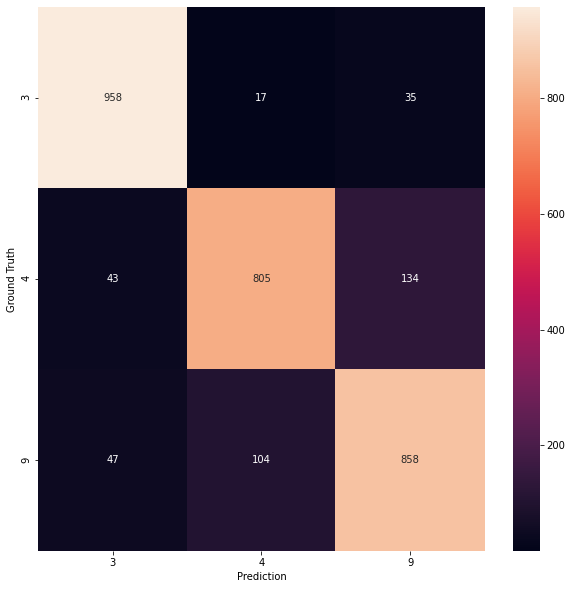

In [64]:
# Generating different subsets: Classes = [3,4,9]

subset1 = np.where((train_y == 3) | (train_y == 4) | (train_y == 9))
subset2 = np.where((test_y == 3) | (test_y == 4) | (test_y == 9))
preds_train = predict(train_X[subset1], [3, 4, 9])
preds = predict(test_X[subset2], [3, 4, 9])

# Train Accuracy
print("Train Accuracy: ", np.mean(preds_train == train_y[subset1]))
# Test Accuracy
print("Test Accuracy: ", np.mean(preds == test_y[subset2]))

# Confusion matrix

cm = confusion_matrix(test_y[subset2], preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=[3,4,9], yticklabels=[3,4,9])
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')

Train Accuracy:  0.6286049989318522
Test Accuracy:  0.627124078230202


Text(69.0, 0.5, 'Ground Truth')

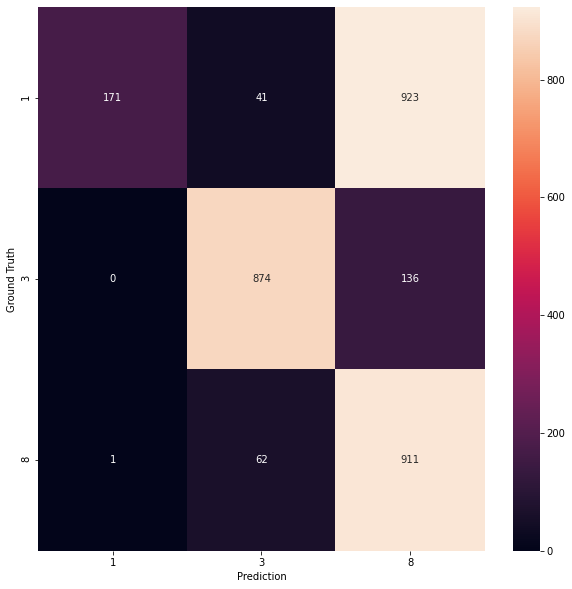

In [65]:
# Generating different subsets: Classes = [1,3,8]

subset1 = np.where((train_y == 1) | (train_y == 3) | (train_y == 8))
subset2 = np.where((test_y == 1) | (test_y == 3) | (test_y == 8))
preds_train = predict(train_X[subset1], [1, 3, 8])
preds = predict(test_X[subset2], [1, 3, 8])

# Train Accuracy
print("Train Accuracy: ", np.mean(preds_train == train_y[subset1]))
# Test Accuracy
print("Test Accuracy: ", np.mean(preds == test_y[subset2]))

# Confusion matrix

cm = confusion_matrix(test_y[subset2], preds)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.0f', xticklabels=[1, 3, 8], yticklabels=[1, 3, 8])
plt.xlabel('Prediction')
plt.ylabel('Ground Truth')